# ⚛️ H₂ VQE — Noisy Ansatz Comparison (Production API)

This notebook compares **ansatz families** for **H₂ VQE** under different
**noise channels**, using only the **packaged VQE API**.

We run **multi-seed noise statistics** and compare ansatzes by:

- Mean and standard deviation of the **energy error**:  ΔE = E_noisy − E_ref
- Mean and standard deviation of the **fidelity** vs a noiseless reference state
- Across a grid of **noise strengths**

Key entry point:

```python
from vqe.core import run_vqe_ansatz_comparison
```

In [1]:
import numpy as np

from vqe.core import run_vqe_ansatz_comparison

### Experiment defaults

- Molecule: **H₂**
- Optimizer: **Adam**
- Steps / stepsize: **50**, **0.2**
- Mapping: **Jordan–Wigner**
- Noise grid: **0.00 → 0.10**
- Seeds: **0 → 9**

$$\text{cost} \sim N_{\text{ansatz}} \times N_{\text{noise}} \times N_{\text{seeds}} \times N_{\text{steps}}$$

In [2]:
molecule = "H2"
optimizer_name = "Adam"
mapping = "jordan_wigner"

steps = 50
stepsize = 0.2

noise_levels = np.arange(0.0, 0.11, 0.02)
seeds = np.arange(0, 10)

ansatzes = [
    "UCC-S",
    "UCC-D",
    "UCCSD",
    "Minimal",
    "RY-CZ",
    "TwoQubit-RY-CNOT",
    "StronglyEntanglingLayers",
]

print("Molecule:", molecule)
print("Optimizer:", optimizer_name)
print("Steps:", steps)
print("Stepsize:", stepsize)
print("Mapping:", mapping)
print("Noise levels:", noise_levels)
print("Seeds:", seeds)
print("Ansatzes:", ansatzes)

Molecule: H2
Optimizer: Adam
Steps: 50
Stepsize: 0.2
Mapping: jordan_wigner
Noise levels: [0.   0.02 0.04 0.06 0.08 0.1 ]
Seeds: [0]
Ansatzes: ['UCC-S', 'UCC-D', 'UCCSD', 'Minimal', 'RY-CZ', 'TwoQubit-RY-CNOT', 'StronglyEntanglingLayers']


## Depolarizing noise: ansatz comparison (multi-seed)


🔹 Ansatz: UCC-S (optimizer=Adam, stepsize=0.2)
  🔹 Computing noiseless references per seed...
Step 01/50: E = -1.116684 Ha
Step 02/50: E = -1.116684 Ha
Step 03/50: E = -1.116684 Ha
Step 04/50: E = -1.110612 Ha
Step 05/50: E = -1.116641 Ha
Step 06/50: E = -1.113163 Ha
Step 07/50: E = -1.112375 Ha
Step 08/50: E = -1.115416 Ha
Step 09/50: E = -1.116629 Ha
Step 10/50: E = -1.114918 Ha
Step 11/50: E = -1.113985 Ha
Step 12/50: E = -1.115227 Ha
Step 13/50: E = -1.116572 Ha
Step 14/50: E = -1.116338 Ha
Step 15/50: E = -1.115300 Ha
Step 16/50: E = -1.115186 Ha
Step 17/50: E = -1.116060 Ha
Step 18/50: E = -1.116675 Ha
Step 19/50: E = -1.116353 Ha
Step 20/50: E = -1.115773 Ha
Step 21/50: E = -1.115837 Ha
Step 22/50: E = -1.116402 Ha
Step 23/50: E = -1.116684 Ha
Step 24/50: E = -1.116403 Ha
Step 25/50: E = -1.116089 Ha
Step 26/50: E = -1.116223 Ha
Step 27/50: E = -1.116581 Ha
Step 28/50: E = -1.116666 Ha
Step 29/50: E = -1.116437 Ha
Step 30/50: E = -1.116303 Ha
Step 31/50: E = -1.116468 Ha
Step 3

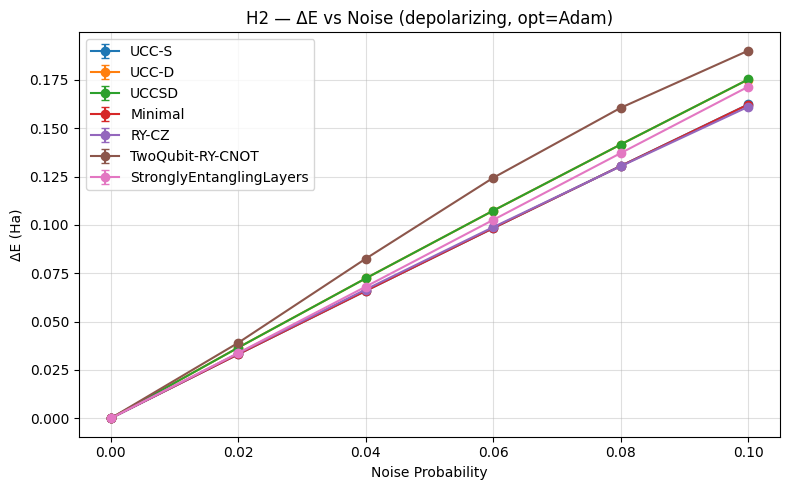

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/noisy_ansatz_comparison_deltae_Adam_noise_scan_dep.png


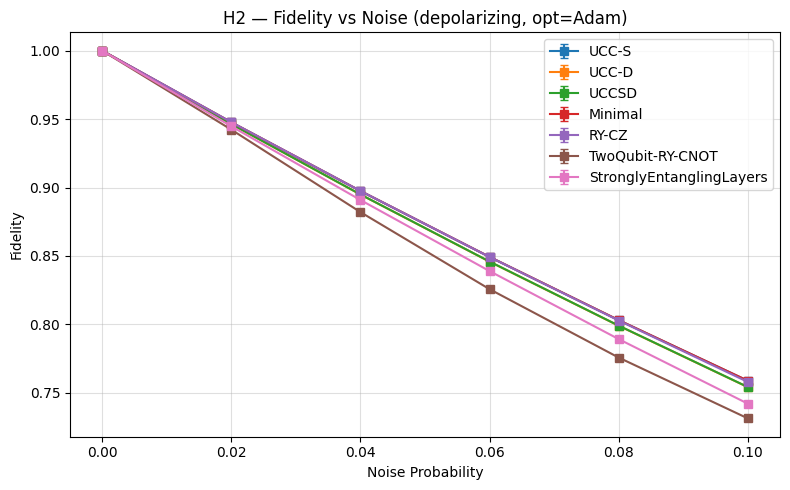

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/noisy_ansatz_comparison_fidelity_Adam_noise_scan_dep.png


In [3]:
dep_results = run_vqe_ansatz_comparison(
    molecule=molecule,
    optimizer_name=optimizer_name,
    ansatzes=ansatzes,
    steps=steps,
    stepsize=stepsize,
    mode="noise_stats",
    noise_type="depolarizing",
    noise_levels=noise_levels,
    seeds=seeds,
    mapping=mapping,
    force=False,
    show=True,
    plot=True,
)


## Amplitude damping noise: ansatz comparison (multi-seed)


🔹 Ansatz: UCC-S (optimizer=Adam, stepsize=0.2)
  🔹 Computing noiseless references per seed...

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_ucc_s_adam_noiseless_s0_ccd80ee1705e.json
  🔹 Sweeping noise levels...

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_ucc_s_adam_noiseless_s0_ccd80ee1705e.json
    p_dep=0.00, p_amp=0.00: ΔE=0.000000 ± 0.000000, ⟨F⟩=1.0000 ± 0.0000
Step 01/50: E = -1.093296 Ha
Step 02/50: E = -1.092800 Ha
Step 03/50: E = -1.088581 Ha
Step 04/50: E = -1.093033 Ha
Step 05/50: E = -1.091582 Ha
Step 06/50: E = -1.090667 Ha
Step 07/50: E = -1.092645 Ha
Step 08/50: E = -1.093157 Ha
Step 09/50: E = -1.091886 Ha
Step 10/50: E = -1.091818 Ha
Step 11/50: E = -1.092915 Ha
Step 12/50: E = -1.093245 Ha
Step 13/50: E = -1.092543 Ha
Step 14/50: E = -1.092283 Ha
Step 15/50: E = -1.092876 Ha
Step 16/50: E = -1.093295 Ha
Step 17/50: E = -1.092982 Ha
Step 18/50: E = -1.092633 Ha
Step 19/50: E = -1.092867 Ha
Ste

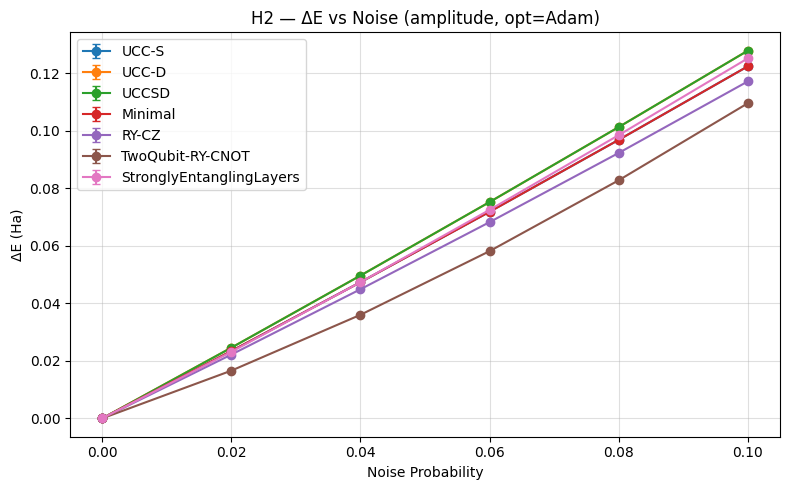

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/noisy_ansatz_comparison_deltae_Adam_noise_scan_amp.png


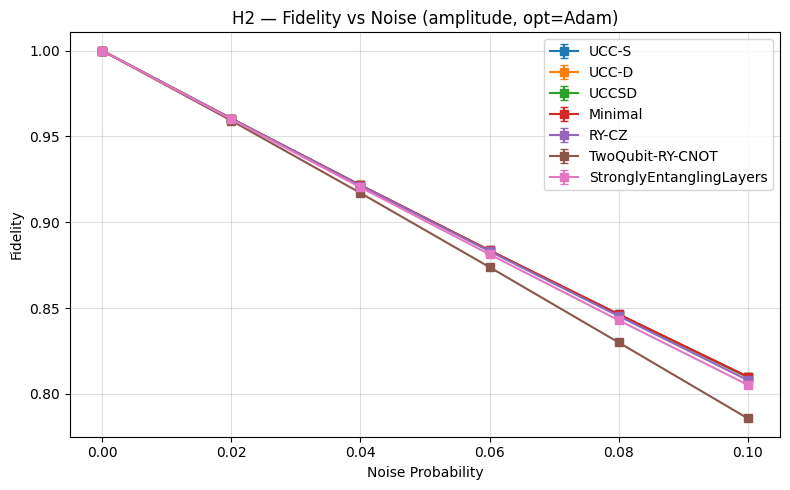

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/noisy_ansatz_comparison_fidelity_Adam_noise_scan_amp.png


In [4]:
amp_results = run_vqe_ansatz_comparison(
    molecule=molecule,
    optimizer_name=optimizer_name,
    ansatzes=ansatzes,
    steps=steps,
    stepsize=stepsize,
    mode="noise_stats",
    noise_type="amplitude",
    noise_levels=noise_levels,
    seeds=seeds,
    mapping=mapping,
    force=False,
    show=True,
    plot=True,
)
